In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt

from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
dSites = ['SpringGarden_','WeedAirport_']
sites = ['Spring Garden','Weed Airport']
dDates = ['2021-12-24','2023-02-28','2024-03-03','2024-03-08']
dates = ['December 24th, 2021','Febuary 28th, 2023','March 3rd, 2024','March 8th, 2024']
siteCords = [(39.91438,-120.81840),(41.47430,-122.45290)]
sI = 0
dI = 2

In [ ]:
path = '/drive/My Drive/Spring 2024/Data Visualization/RWIS/Final/data/'
datafile = path+dSites[sI]+dDates[dI]+".csv"
strSiteName = sites[sI]
strDate = dates[dI]
cords = siteCords[sI]
startTime = dt.datetime.strptime(dDates[dI], '%Y-%m-%d') + dt.timedelta(hours=8)
print(startTime)

2024-03-03 08:00:00


In [ ]:
!pip install cartopy

In [ ]:
from cartopy import crs as ccrs, feature as cfeature
from cartopy.io.img_tiles import OSM

Text(0.5, 1.0, 'Spring Garden')

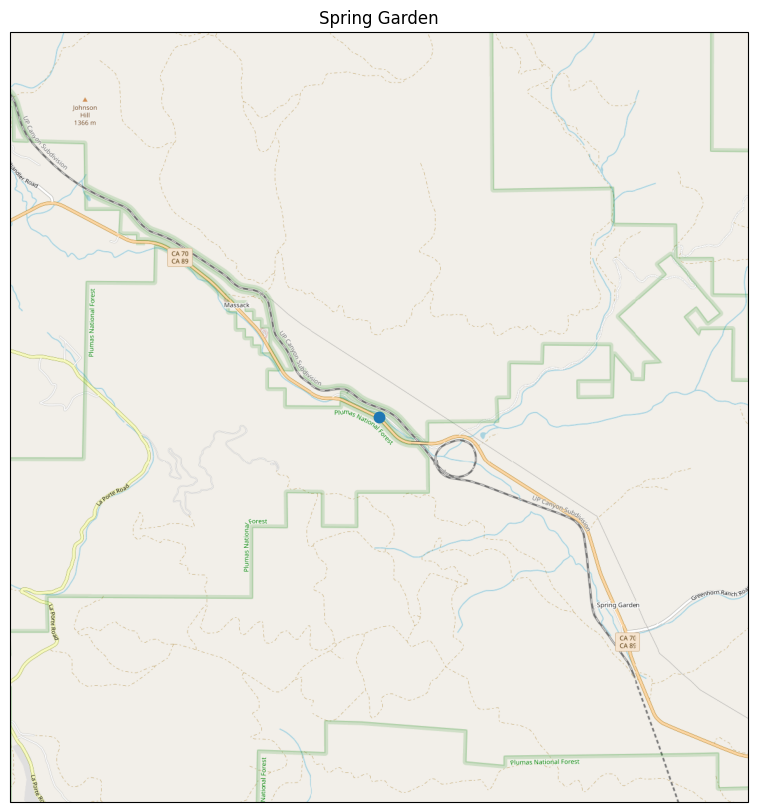

In [ ]:
xDist = 0.05
yDist = 0.04
imagery = OSM()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=imagery.crs)
ax.set_extent([cords[1]-xDist,cords[1]+xDist,cords[0]-yDist,cords[0]+yDist], ccrs.PlateCarree())
ax.add_image(imagery, 14)
#-112.557,46.01
ax.plot(cords[1],cords[0],'.',transform=ccrs.PlateCarree(),markersize=15)
ax.set_title(strSiteName)

In [ ]:
df = pd.read_csv(datafile,skiprows = [1,2])
df.head()

,timestamp:utc,timestamp:localstring,essAvgWindDirection,essAvgWindSpeed,essMaxWindGustSpeed,essMaxWindGustDir,essAirTemperature.1,essDewpointTemp,essRelativeHumidity,essPrecipitationOneHour,essSurfaceStatus.1,essSurfaceStatus.2,essSurfaceTemperature.1,essSurfaceTemperature.2
0,1709453220,2024/03/03-00:07 -0800,0,0.0,5.144953,260.0,27.86,26.60,94,0.090551,Snow Watch,Snow Watch,27.68,28.22
1,1709454120,2024/03/03-00:22 -0800,0,0.0,4.250179,271.0,27.86,26.60,94,0.082677,Snow Watch,Snow Watch,27.50,27.86
2,1709455020,2024/03/03-00:37 -0800,0,0.0,0.894775,304.0,27.68,26.42,94,0.070866,Snow Watch,Snow Watch,28.76,29.30
3,1709455920,2024/03/03-00:52 -0800,0,0.0,3.579098,282.0,27.86,26.24,93,0.070866,Snow Watch,Snow Watch,27.68,28.22
4,1709456820,2024/03/03-01:07 -0800,0,0.0,0.000000,164.0,27.68,26.06,93,0.066929,Snow Watch,Snow Watch,25.88,26.96


In [ ]:
df["datetime"] = pd.to_datetime(df["timestamp:localstring"])

xScale = 24
yScale = 4
minT,maxT = 20,60

In [ ]:
heatCMap = 'plasma'
humidityCMap = 'viridis'

# Air Temperature

Text(0.5, 1.0, 'Spring Garden Air Temperature March 3rd, 2024')

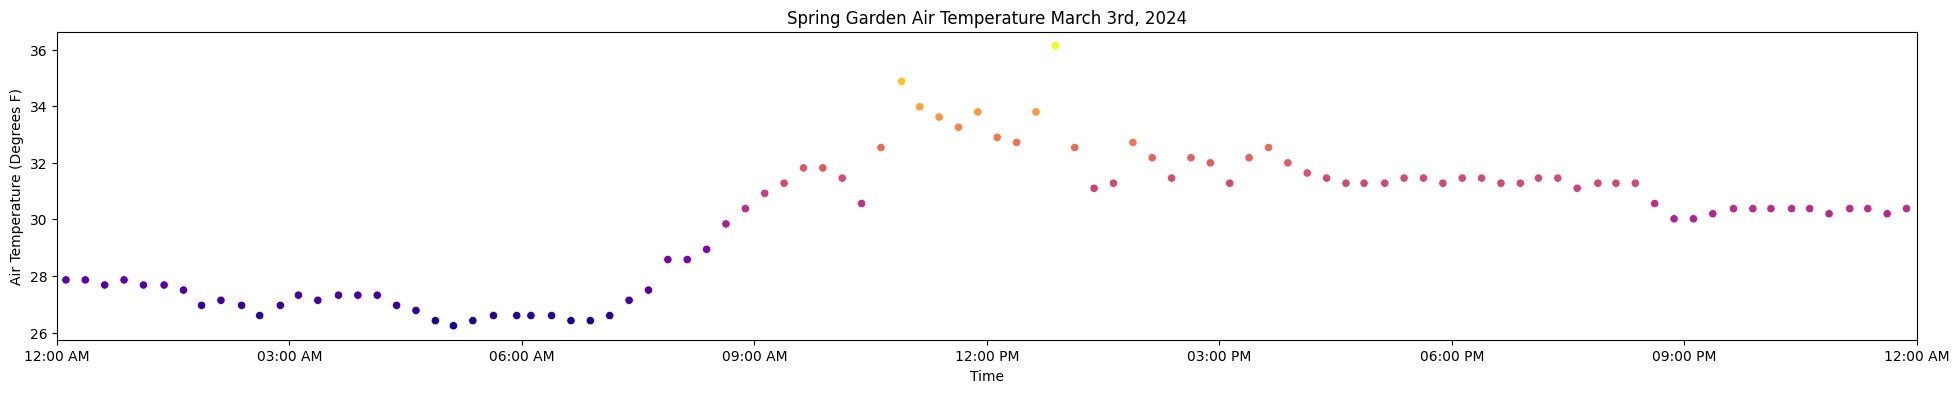

In [ ]:
strSensors = "Air Temperature"

# Makes a scatterplot showing air temperature.
# Note how the color is controlled.
g = sns.scatterplot(data=df, x="datetime", y="essAirTemperature.1", hue ="essAirTemperature.1", palette=heatCMap, legend=False)
# Make the figure a reasonable width and height
g.figure.set_size_inches(xScale,yScale)
# Demonstrates how to set the limits on the vertical axis.
g.axes.set_xlim(startTime,startTime+dt.timedelta(hours=24))
#Control xticks
xTicks = [(startTime + dt.timedelta(hours=3) * i) for i in range(9)]
xLabels = [(x - dt.timedelta(hours=8)).strftime('%I:%M %p') for x in xTicks]
g.set_xticks(xTicks)
g.set_xticklabels(xLabels)
# Add Axis Labels
g.axes.set_xlabel('Time')
g.axes.set_ylabel("Air Temperature (Degrees F)")
# Add a title
strTitle = strSiteName + " " + strSensors + " " + strDate
g.set_title(strTitle)

Text(0, 0.5, 'Density')

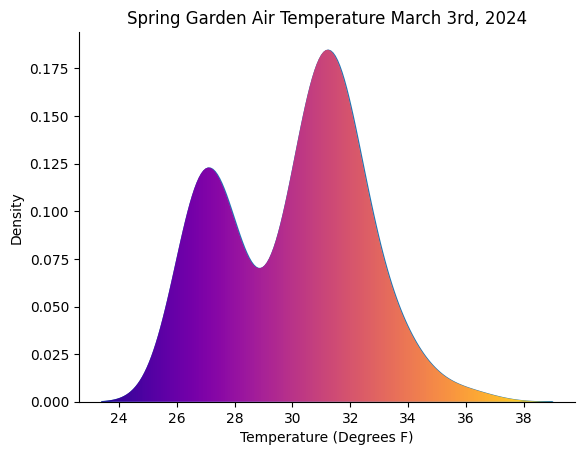

In [ ]:
strSensors = "Air Temperature"

ax = sns.kdeplot(data=df, x='essAirTemperature.1', fill=True)

sns.despine()
cmap = heatCMap
im = ax.imshow(np.linspace(0, 1, 256).reshape(1, -1), cmap=cmap, aspect='auto',
               extent=[*ax.get_xlim(), *ax.get_ylim()], zorder=10)
path = ax.collections[0].get_paths()[0]
patch = matplotlib.patches.PathPatch(path, transform=ax.transData)
im.set_clip_path(patch)

plt.title(strSiteName + " " + strSensors + " " + strDate)
plt.xlabel("Temperature (Degrees F)")
plt.ylabel("Density")

# Air Temperature and Dewpoint

Text(0.5, 1.0, 'Spring Garden Air Temperature and Dewpoint March 3rd, 2024')

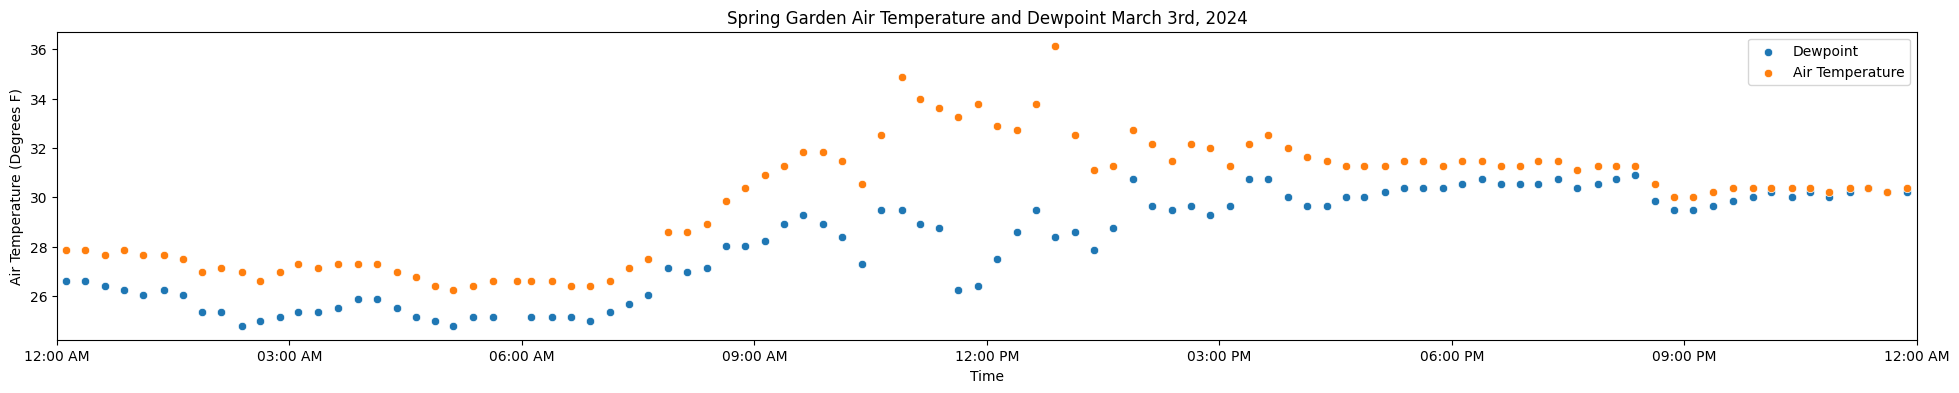

In [ ]:
strSensors = "Air Temperature and Dewpoint"

# Makes a scatterplot showing air temperature.
# Note how the color is controlled.
g = sns.scatterplot(data=df, x="datetime", y="essDewpointTemp",label='Dewpoint')
g1 = sns.scatterplot(data=df, x="datetime", y="essAirTemperature.1",label='Air Temperature')

# Make the figure a reasonable width and height
g.figure.set_size_inches(xScale,yScale)
# Demonstrates how to set the limits on the vertical axis.
g.axes.set_xlim(startTime,startTime+dt.timedelta(hours=24))
#Control xticks
xTicks = [(startTime + dt.timedelta(hours=3) * i) for i in range(9)]
xLabels = [(x - dt.timedelta(hours=8)).strftime('%I:%M %p') for x in xTicks]
g.set_xticks(xTicks)
g.set_xticklabels(xLabels)
# Add Axis Labels
g.axes.set_xlabel('Time')
g.axes.set_ylabel("Air Temperature (Degrees F)")
plt.legend(loc='upper right', labels=['Dewpoint', 'Air Temperature'])
# Add a title
strTitle = strSiteName + " " + strSensors + " " + strDate
g.set_title(strTitle)

Text(0.5, 29.000000000000092, 'Dewpoint (Degrees F)')

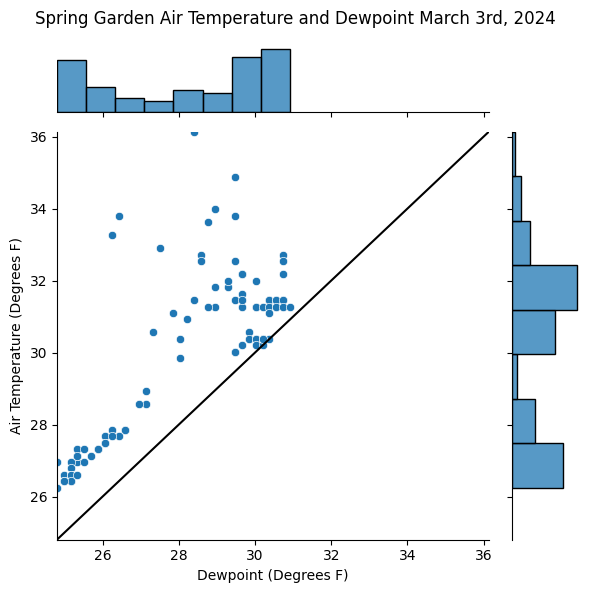

In [ ]:
strSensors = "Air Temperature and Dewpoint"

g=sns.jointplot(data=df,y='essAirTemperature.1',x='essDewpointTemp')
minV = min(df['essAirTemperature.1'].min(),df['essDewpointTemp'].min())
maxV = max(df['essAirTemperature.1'].max(),df['essDewpointTemp'].max())
g.ax_joint.set_xlim(minV,maxV)
g.ax_joint.set_ylim(minV,maxV)
g.ax_joint.plot([minV,maxV],[minV,maxV],'-k')
plt.suptitle(strSiteName + " " + strSensors + " " + strDate)
plt.tight_layout()
plt.ylabel("Air Temperature (Degrees F)")
plt.xlabel("Dewpoint (Degrees F)")

# Percipitation

Text(0.5, 1.0, 'Spring Garden Percipitation March 3rd, 2024')

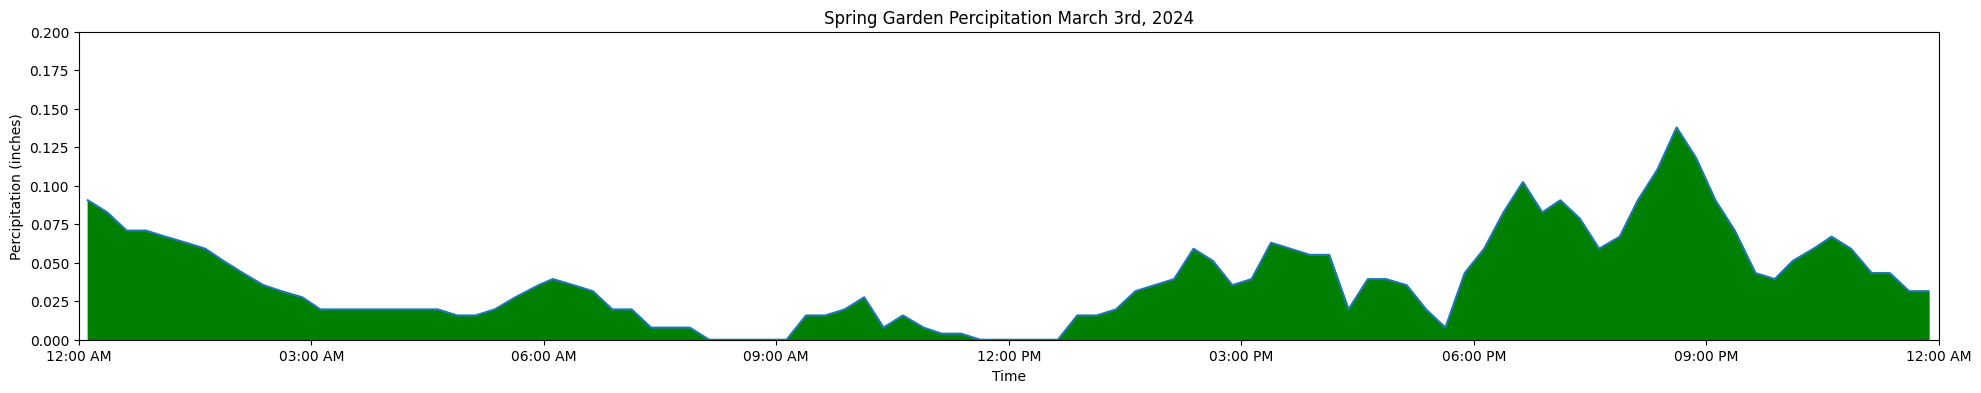

In [ ]:
strSensors = "Percipitation"

g = sns.lineplot(data=df, x="datetime", y="essPrecipitationOneHour", legend=False)

# Make the figure a reasonable width and height
g.figure.set_size_inches(xScale,yScale)
# Demonstrates how to set the limits on the vertical axis.
g.axes.set_ylim(0,0.2)
g.axes.set_xlim(startTime,startTime+dt.timedelta(hours=24))
#Control xticks
xTicks = [(startTime + dt.timedelta(hours=3) * i) for i in range(9)]
xLabels = [(x - dt.timedelta(hours=8)).strftime('%I:%M %p') for x in xTicks]
g.set_xticks(xTicks)
g.set_xticklabels(xLabels)
# Add Axis Labels
g.axes.set_xlabel('Time')
g.axes.set_ylabel("Percipitation (inches)")
plt.fill_between(df['datetime'].values, df['essPrecipitationOneHour'].values, color='green')
# Add a title
strTitle = strSiteName + " " + strSensors + " " + strDate
g.set_title(strTitle)

Text(0.6944444444444446, 0.5, 'Proportion')

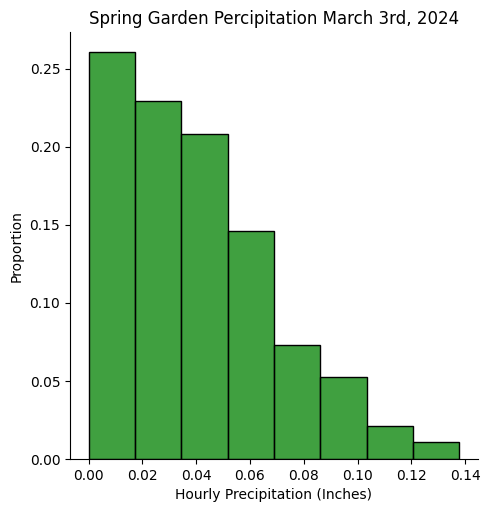

In [ ]:
strSensors = "Percipitation"

g=sns.displot(data=df,x='essPrecipitationOneHour',kind='hist',stat='probability',color='green')
plt.title(strSiteName + " " + strSensors + " " + strDate)
plt.xlabel("Hourly Precipitation (Inches)")
plt.ylabel("Proportion")

# Relative Humidity

Text(0.5, 1.0, 'Spring Garden Relative Humidity March 3rd, 2024')

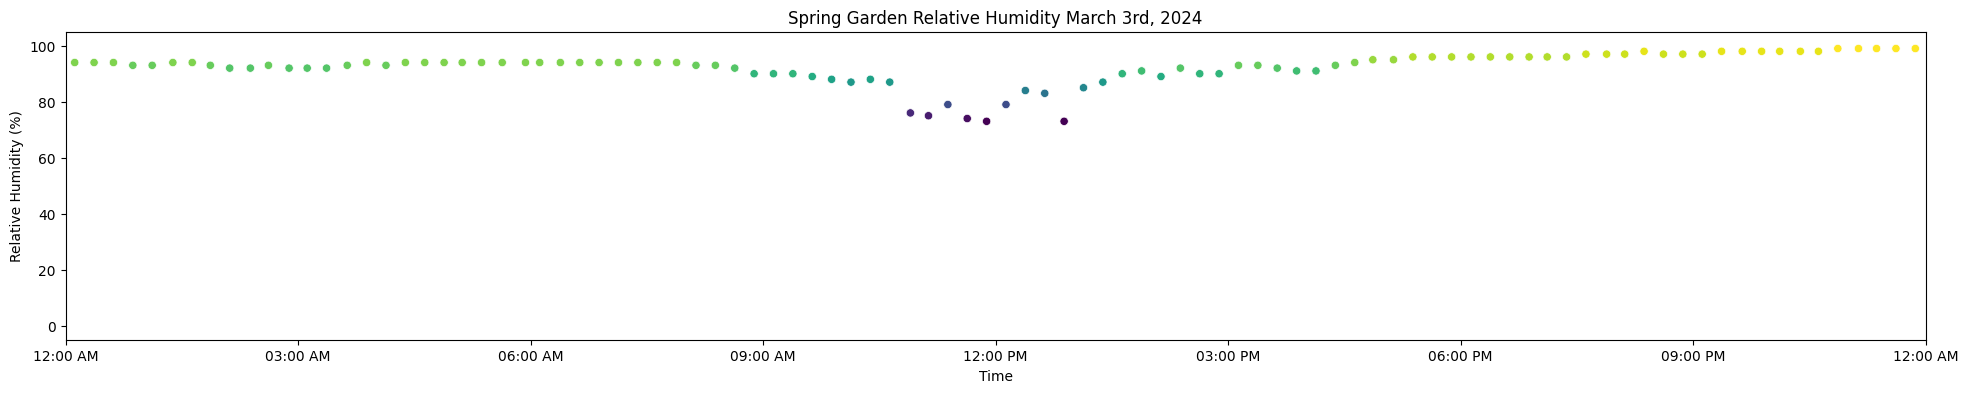

In [ ]:
strSensors = "Relative Humidity"

# Uses a different palette for humidity.
g=sns.scatterplot(data=df, x="datetime", y="essRelativeHumidity", hue ="essRelativeHumidity",palette=humidityCMap, legend=False)
# Make the figure a reasonable width and height
g.figure.set_size_inches(xScale,yScale)
# Demonstrates how to set the limits on the vertical axis.
g.axes.set_ylim(-5,105)
g.axes.set_xlim(startTime,startTime+dt.timedelta(hours=24))
#Control xticks
xTicks = [(startTime + dt.timedelta(hours=3) * i) for i in range(9)]
xLabels = [(x - dt.timedelta(hours=8)).strftime('%I:%M %p') for x in xTicks]
g.set_xticks(xTicks)
g.set_xticklabels(xLabels)
g.axes.set_xlabel("Time")
g.axes.set_ylabel("Relative Humidity (%)")
# Add a title
strTitle = strSiteName + " " + strSensors + " " + strDate
g.set_title(strTitle)

Text(0, 0.5, 'Density')

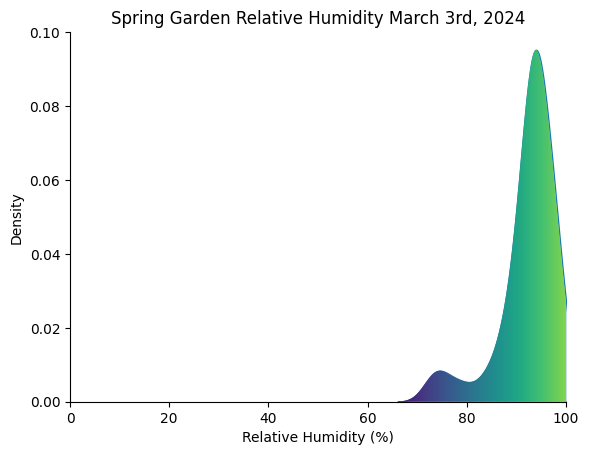

In [ ]:
strSensors = "Relative Humidity"

ax=sns.kdeplot(data=df,x='essRelativeHumidity',fill=True)

sns.despine()
cmap = humidityCMap
im = ax.imshow(np.linspace(0, 1, 256).reshape(1, -1), cmap=cmap, aspect='auto',
               extent=[*ax.get_xlim(), *ax.get_ylim()], zorder=10)
path = ax.collections[0].get_paths()[0]
patch = matplotlib.patches.PathPatch(path, transform=ax.transData)
im.set_clip_path(patch)

plt.xlim(0,100)
plt.title(strSiteName + " " + strSensors + " " + strDate)
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Density")

# Average Wind Speed and Direction

4
1


Text(0.5, 1.0, 'Spring Garden Average Wind Speed and Direction March 3rd, 2024')

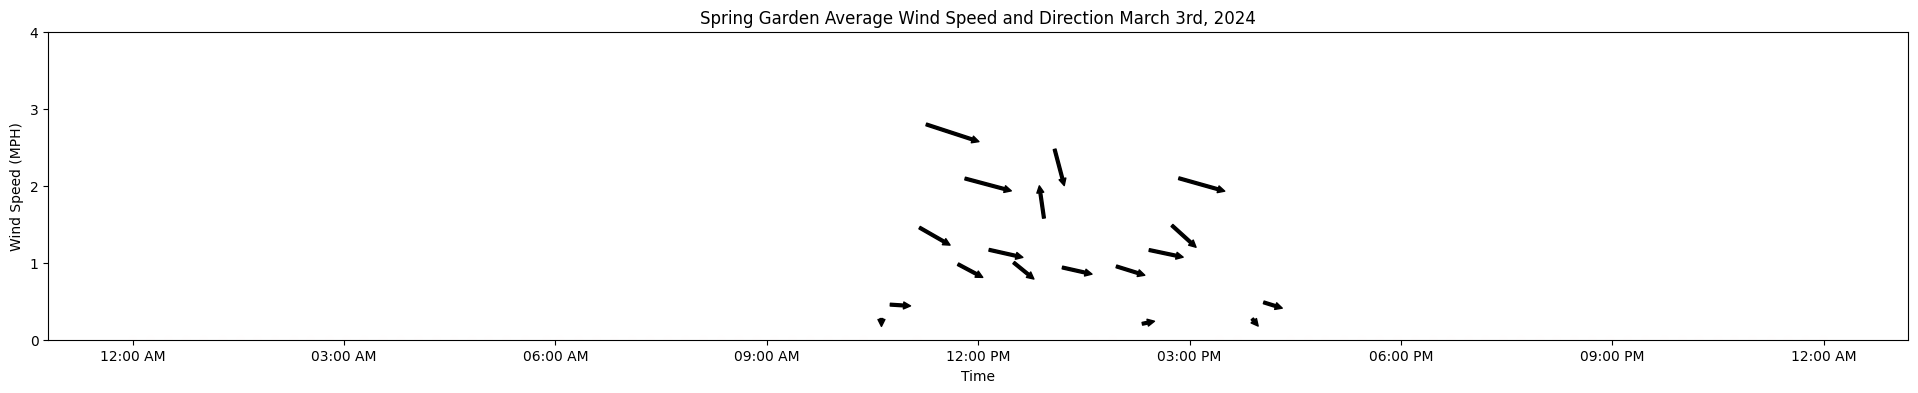

In [ ]:
import math

def ReallyBadFunction(n):
    for i in range(n-1,0,-1):
        if n%i == 0 and n/i < 7 and n/i >= 4:
            return n,i
    print(n+1)
    return ReallyBadFunction(n+1)

strSensors = "Average Wind Speed and Direction"

arrowScale = 0.9
w = 0.005

tempDF = pd.DataFrame()
tempDF['timeT'] = df['timestamp:utc']-df['timestamp:utc'].min()
tempDF['time'] = tempDF['timeT']/tempDF['timeT'].max()
tempDF['value'] = df['essAvgWindSpeed']/df['essAvgWindSpeed'].max()
tempDF['rot'] = df['essAvgWindDirection']

# Uses a different palette for humidity.
g=sns.scatterplot(data=tempDF, x="time", y="value", hue =36, hue_norm = (32,40), palette='bwr', legend=False)
# Make the figure a reasonable width and height
g.figure.set_size_inches(xScale,yScale)
# Demonstrates how to set the limits on the vertical axis.
g.axes.set_ylim(0,1.25)
#Control xticks

xTemps = [(startTime + dt.timedelta(hours=3) * i) for i in range(9)]
xLabels = [(x - dt.timedelta(hours=8)).strftime('%I:%M %p') for x in xTemps]
xTicks = [i/8 for i in range(9)]
g.set_xticks(xTicks)
g.set_xticklabels(xLabels)

n,nt = ReallyBadFunction(int(df['essAvgWindSpeed'].max())+2)
print(n)
print(nt)
ind = int(n/nt)
yTicks = [i*nt/df['essAvgWindSpeed'].max() for i in range(ind+1)]
yLabels = [i*nt for i in range(ind+1)]
g.set_yticks(yTicks)
g.set_yticklabels(yLabels)

g.axes.set_xlabel("Time")
g.axes.set_ylabel("Wind Speed (MPH)")

for index,row in tempDF.iterrows():
    xTemp = row['time']
    yTemp = row['value']
    rTemp = row['rot']
    if yTemp > 0:
        x = -math.sin(math.radians(rTemp)) * arrowScale / xScale * math.sqrt(yTemp)
        y = -math.cos(math.radians(rTemp)) * arrowScale / yScale * math.sqrt(yTemp)
        hLen = math.sqrt(math.pow(x,2)+math.pow(y,2))/3
        plt.annotate('',xy=(xTemp+x/2,yTemp+y/2),xytext=(xTemp-x/2,yTemp-y/2),arrowprops=dict(facecolor='black',arrowstyle='simple'))

# Add a title
strTitle = strSiteName + " " + strSensors + " " + strDate
g.set_title(strTitle)

Text(29.000000000000007, 0.5, 'Wind Speed (MPH)')

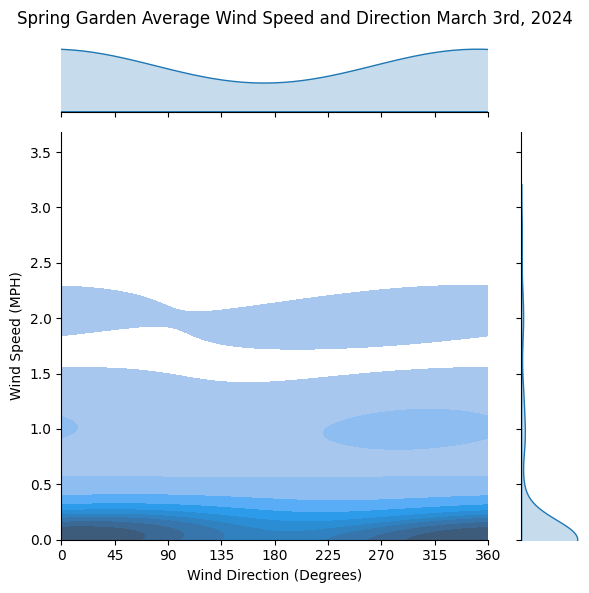

In [ ]:
strSensors = "Average Wind Speed and Direction"

tempDF = pd.DataFrame()
tempDF['Speed'] = df['essAvgWindSpeed']
tempDF['Direction'] = df['essAvgWindDirection']

tempTwo = pd.DataFrame()
tempTwo['Speed'] = df['essAvgWindSpeed']
tempTwo['Direction'] = df['essAvgWindDirection']-360

tempThree = pd.DataFrame()
tempThree['Speed'] = df['essAvgWindSpeed']
tempThree['Direction'] = df['essAvgWindDirection']+360

temp = pd.concat([tempDF,tempTwo,tempThree],ignore_index=True)

g=sns.jointplot(data=temp,y='Speed',x='Direction',kind='kde',fill=True)
g.ax_joint.set_xlim(0,360)
g.ax_joint.set_xticks(range(0,361,45))
g.ax_joint.set_ylim(0,df['essAvgWindSpeed'].max()+1)
plt.suptitle(strSiteName + " " + strSensors + " " + strDate)
plt.tight_layout()
plt.xlabel("Wind Direction (Degrees)")
plt.ylabel("Wind Speed (MPH)")

# Wind Gust Speed and Direction

8
2


Text(0.5, 1.0, 'Spring Garden Wind Gust Speed and Direction March 3rd, 2024')

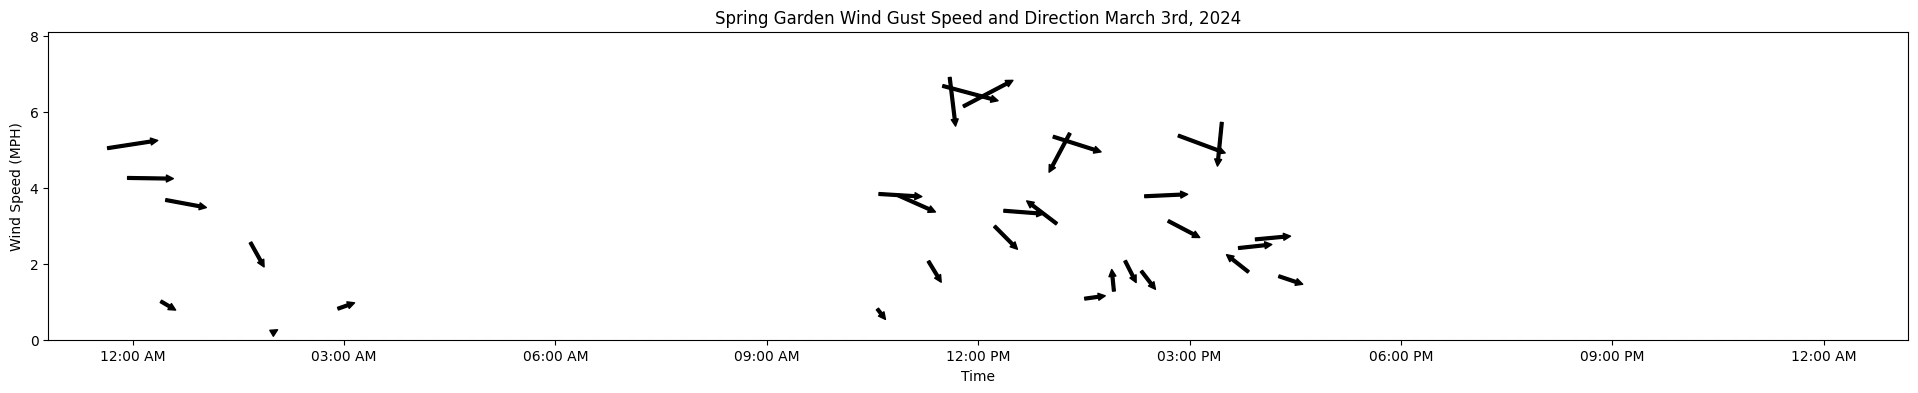

In [ ]:
strSensors = "Wind Gust Speed and Direction"

arrowScale = 0.9
w = 0.005

tempDF = pd.DataFrame()
tempDF['timeT'] = df['timestamp:utc']-df['timestamp:utc'].min()
tempDF['time'] = tempDF['timeT']/tempDF['timeT'].max()
tempDF['value'] = df['essMaxWindGustSpeed']/df['essMaxWindGustSpeed'].max()
tempDF['rot'] = df['essMaxWindGustDir']

# Uses a different palette for humidity.
g=sns.scatterplot(data=tempDF, x="time", y="value", hue =36, hue_norm = (32,40), palette='bwr', legend=False)
# Make the figure a reasonable width and height
g.figure.set_size_inches(xScale,yScale)
# Demonstrates how to set the limits on the vertical axis.
g.axes.set_ylim(0,1.25)
#Control xticks

xTemps = [(startTime + dt.timedelta(hours=3) * i) for i in range(9)]
xLabels = [(x - dt.timedelta(hours=8)).strftime('%I:%M %p') for x in xTemps]
xTicks = [i/8 for i in range(9)]
g.set_xticks(xTicks)
g.set_xticklabels(xLabels)

n,nt = ReallyBadFunction(int(df['essMaxWindGustSpeed'].max())+2)
print(n)
print(nt)
ind = int(n/nt)
yTicks = [i*nt/df['essMaxWindGustSpeed'].max() for i in range(ind+1)]
yLabels = [i*nt for i in range(ind+1)]
g.set_yticks(yTicks)
g.set_yticklabels(yLabels)

g.axes.set_xlabel("Time")
g.axes.set_ylabel("Wind Speed (MPH)")

for index,row in tempDF.iterrows():
    xTemp = row['time']
    yTemp = row['value']
    rTemp = row['rot']
    if yTemp > 0:
        x = -math.sin(math.radians(rTemp)) * arrowScale / xScale * math.sqrt(yTemp)
        y = -math.cos(math.radians(rTemp)) * arrowScale / yScale * math.sqrt(yTemp)
        hLen = math.sqrt(math.pow(x,2)+math.pow(y,2))/3
        plt.annotate('',xy=(xTemp+x/2,yTemp+y/2),xytext=(xTemp-x/2,yTemp-y/2),arrowprops=dict(facecolor='black',arrowstyle='simple'))

# Add a title
strTitle = strSiteName + " " + strSensors + " " + strDate
g.set_title(strTitle)

Text(42.12500000000001, 0.5, 'Wind Speed (MPH)')

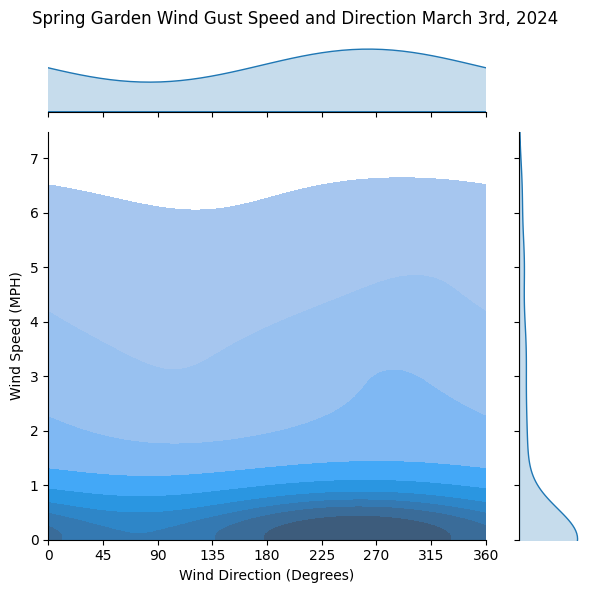

In [ ]:
strSensors = "Wind Gust Speed and Direction"

tempDF = pd.DataFrame()
tempDF['Speed'] = df['essMaxWindGustSpeed']
tempDF['Direction'] = df['essMaxWindGustDir']

tempTwo = pd.DataFrame()
tempTwo['Speed'] = df['essMaxWindGustSpeed']
tempTwo['Direction'] = df['essMaxWindGustDir']-360

tempThree = pd.DataFrame()
tempThree['Speed'] = df['essMaxWindGustSpeed']
tempThree['Direction'] = df['essMaxWindGustDir']+360

temp = pd.concat([tempDF,tempTwo,tempThree],ignore_index=True)

g=sns.jointplot(data=temp,y='Speed',x='Direction',kind='kde',fill=True)
g.ax_joint.set_xlim(0,360)
g.ax_joint.set_xticks(range(0,361,45))
g.ax_joint.set_ylim(0,df['essMaxWindGustSpeed'].max()+1)
plt.suptitle(strSiteName + " " + strSensors + " " + strDate)
plt.tight_layout()
plt.xlabel("Wind Direction (Degrees)")
plt.ylabel("Wind Speed (MPH)")

# Average and Gust Wind Speed

Text(0.5, 1.0, 'Spring Garden Average and Gust Wind Speed March 3rd, 2024')

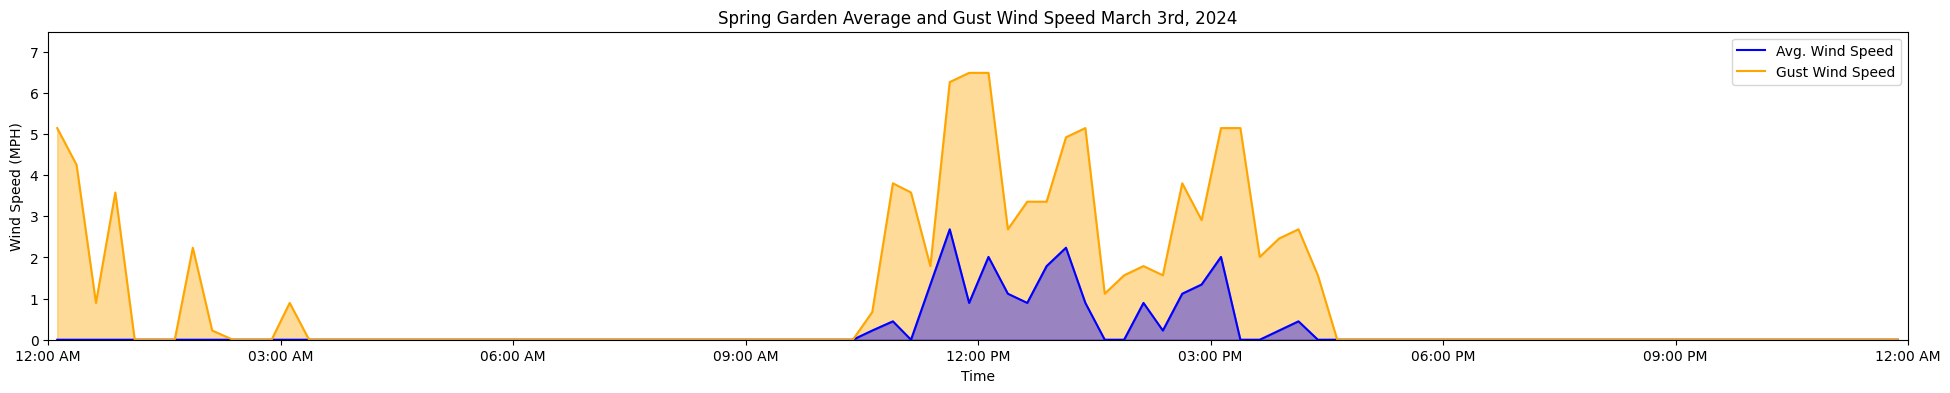

In [ ]:
strSensors = "Average and Gust Wind Speed"

# Uses a different palette for humidity.
g=sns.lineplot(data=df, x="datetime", y="essAvgWindSpeed", label='Avg. Wind Speed',color='blue')
g1=sns.lineplot(data=df, x="datetime", y="essMaxWindGustSpeed", label='Gust Wind Speed',color='orange')
#plt.legend(loc='upper right', labels=['Gust Speed'])
# Make the figure a reasonable width and height
g.figure.set_size_inches(xScale,yScale)
# Demonstrates how to set the limits on the vertical axis.
g.axes.set_ylim(0,max(df['essAvgWindSpeed'].max(),df['essMaxWindGustSpeed'].max())+1)
g.axes.set_xlim(startTime,startTime+dt.timedelta(hours=24))
#Control xticks
xTicks = [(startTime + dt.timedelta(hours=3) * i) for i in range(9)]
xLabels = [(x - dt.timedelta(hours=8)).strftime('%I:%M %p') for x in xTicks]
g.set_xticks(xTicks)
g.set_xticklabels(xLabels)
g.axes.set_xlabel("Time")
g.axes.set_ylabel("Wind Speed (MPH)")
plt.fill_between(df['datetime'].values, df['essMaxWindGustSpeed'].values, color='orange',alpha=0.4)
plt.fill_between(df['datetime'].values, df['essAvgWindSpeed'].values, color='blue',alpha=0.4)
# Add a title
strTitle = strSiteName + " " + strSensors + " " + strDate
g.set_title(strTitle)

Text(27.619388888888885, 0.5, 'Density')

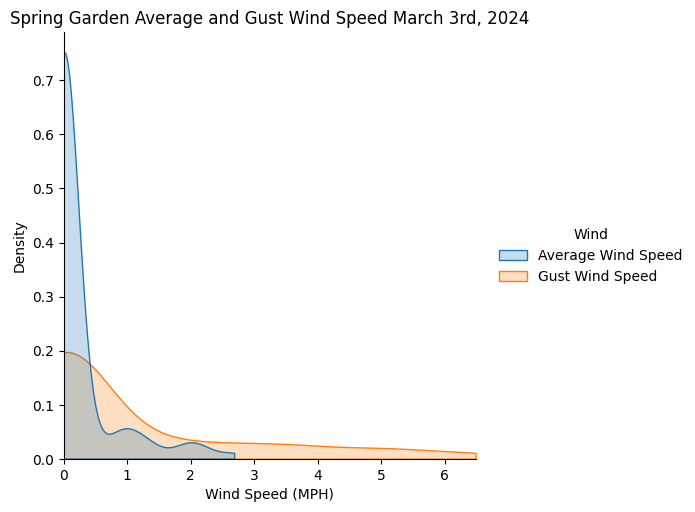

In [ ]:
strSensors = "Average and Gust Wind Speed"

s = pd.DataFrame([[row['essAvgWindSpeed'],'Average Wind Speed'] for index,row in df.iterrows()]+[[row['essMaxWindGustSpeed'],'Gust Wind Speed'] for index,row in df.iterrows()],columns=['Speed (MPH)','Wind'])
sns.displot(data=s,x='Speed (MPH)',hue='Wind',kind='kde',fill=True,cut=0)
plt.xlim(0,s['Speed (MPH)'].max())
plt.title(strSiteName + " " + strSensors + " " + strDate)
plt.xlabel("Wind Speed (MPH)")
plt.ylabel("Density")

# Average Wind and Gust Direction

Text(0.5, 1.0, 'Spring Garden Average and Gust Wind Direction March 3rd, 2024')

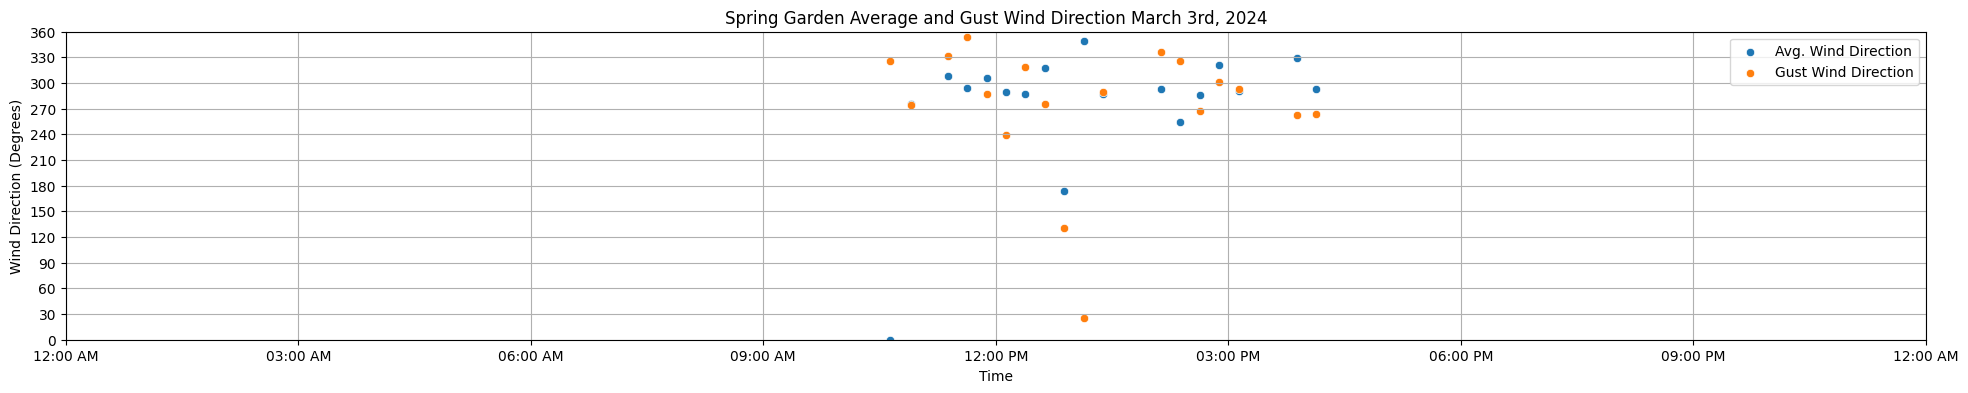

In [ ]:
strSensors = "Average and Gust Wind Direction"

temp = df.loc[(df['essAvgWindSpeed'] != 0)&(df['essMaxWindGustSpeed'] != 0)]

# Uses a different palette for humidity.
g=sns.scatterplot(data=temp, x="datetime", y="essAvgWindDirection", label='Avg. Wind Direction')
g1=sns.scatterplot(data=temp, x="datetime", y="essMaxWindGustDir", label='Gust Wind Direction')
#plt.legend(loc='upper right', labels=['Gust Speed'])
# Make the figure a reasonable width and height
g.figure.set_size_inches(xScale,yScale)
# Demonstrates how to set the limits on the vertical axis.
g.axes.set_ylim(0,360)
g.axes.set_xlim(startTime,startTime+dt.timedelta(hours=24))
#Control xticks
xTicks = [(startTime + dt.timedelta(hours=3) * i) for i in range(9)]
xLabels = [(x - dt.timedelta(hours=8)).strftime('%I:%M %p') for x in xTicks]
g.set_xticks(xTicks)
g.set_xticklabels(xLabels)

yTicks = [30 * i for i in range(13)]
yLabels = [x for x in yTicks]
g.set_yticks(yTicks)
g.set_yticklabels(yLabels)

g.axes.set_xlabel("Time")
g.axes.set_ylabel("Wind Direction (Degrees)")

plt.grid()
# Add a title
strTitle = strSiteName + " " + strSensors + " " + strDate
g.set_title(strTitle)

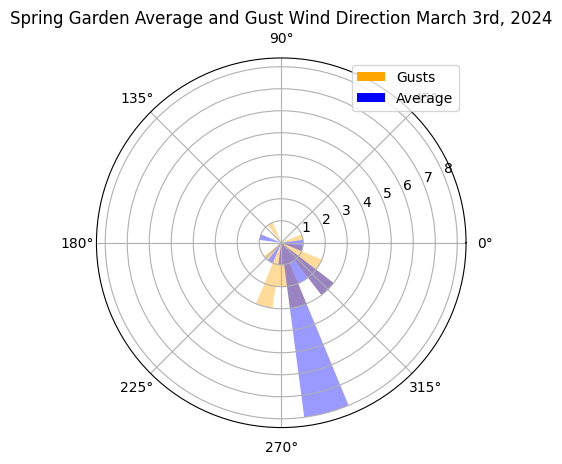

In [ ]:
strSensors = "Average and Gust Wind Direction"

temp = df.loc[(df['essAvgWindSpeed'] != 0)&(df['essMaxWindGustSpeed'] != 0)]

s = pd.DataFrame([[len(temp.loc[(temp['essAvgWindDirection']>=i)&(temp['essAvgWindDirection']<i+15)]),len(temp.loc[(temp['essMaxWindGustDir']>=i)&(temp['essMaxWindGustDir']<i+15)])] for i in range(0,360,15)],columns=['Avg','Gust'])

#I used this stack overflow post to figure out how to do the polar plot
#https://stackoverflow.com/a/22568292

N = 24
t = np.linspace(0.0,2*np.pi,N,endpoint=False)
w = (2*np.pi)/N

ax = plt.subplot(111, polar=True)
barsGust = ax.bar(t,s['Gust'],width=w,label='Gusts',color='orange')
barsAvg = ax.bar(t,s['Avg'],width=w,label='Average',color='blue')
ax.legend()
plt.title(strSiteName + " " + strSensors + " " + strDate)

for i in range(N):
    barsAvg[i].set_alpha(0.4)
    barsGust[i].set_alpha(0.4)

# Surface Temperature

Text(0.5, 1.0, 'Spring Garden Surface Temperatures March 3rd, 2024')

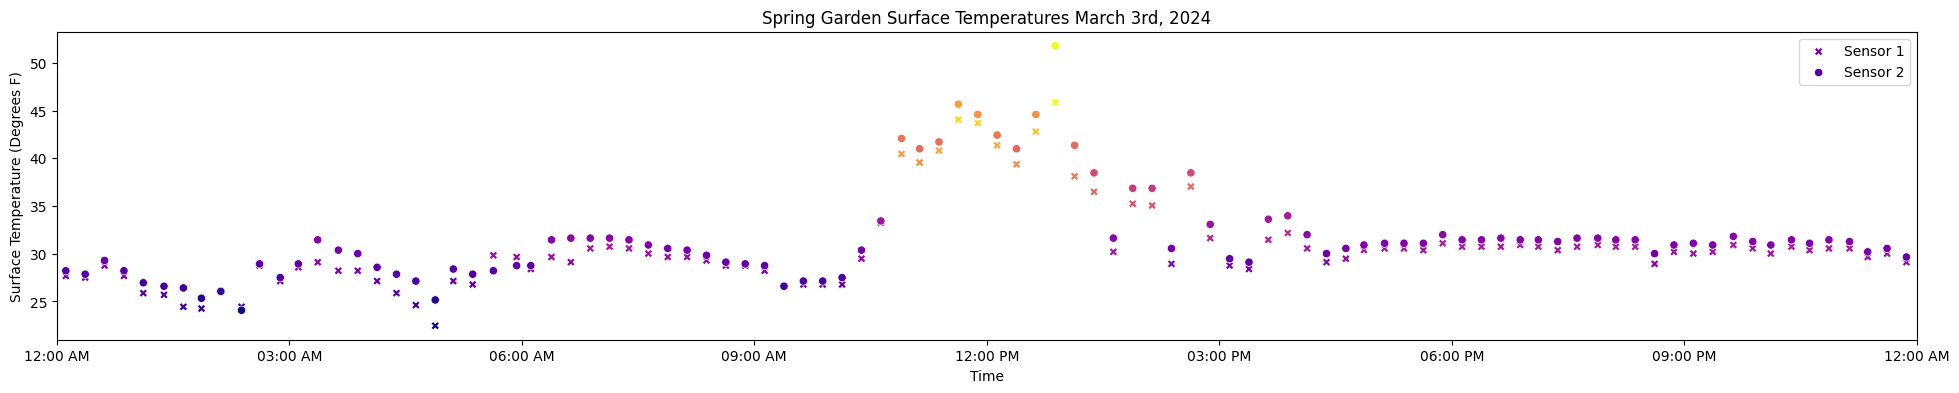

In [ ]:
strSensors = "Surface Temperatures"

g1 =sns.scatterplot(data=df,x="datetime",y="essSurfaceTemperature.1",hue="essSurfaceTemperature.1",marker="X",palette=heatCMap,label='Sensor 1',legend=False)
g2 =sns.scatterplot(data=df,x="datetime",y="essSurfaceTemperature.2",hue="essSurfaceTemperature.2",marker="o",palette=heatCMap,label='Sensor 2',legend=False)
g1.figure.set_size_inches(xScale,yScale)
g1.axes.set_xlim(startTime,startTime+dt.timedelta(hours=24))
#Control xticks
xTicks = [(startTime + dt.timedelta(hours=3) * i) for i in range(9)]
xLabels = [(x - dt.timedelta(hours=8)).strftime('%I:%M %p') for x in xTicks]
g1.set_xticks(xTicks)
g1.set_xticklabels(xLabels)
g1.axes.set_xlabel("Time")
g1.axes.set_ylabel("Surface Temperature (Degrees F)")
plt.legend(loc='upper right', labels=['Sensor 1', 'Sensor 2'])
# Add a title
strTitle = strSiteName + " " + strSensors + " " + strDate
g1.set_title(strTitle)

Text(12.830541666666663, 0.5, 'Density')

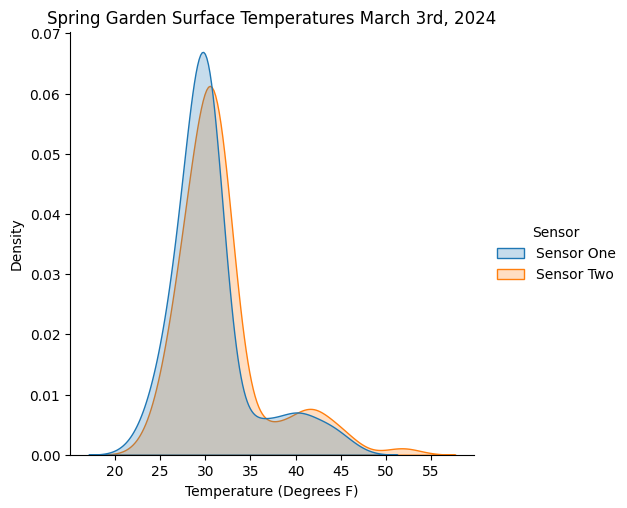

In [ ]:
strSensors = "Surface Temperatures"

s = pd.DataFrame([[row['essSurfaceTemperature.1'],'Sensor One'] for index,row in df.iterrows()]+[[row['essSurfaceTemperature.2'],'Sensor Two'] for index,row in df.iterrows()],columns=['Temperature (Degrees F)','Sensor'])
sns.displot(data=s,x='Temperature (Degrees F)',hue='Sensor',kind='kde',fill=True)
plt.title(strSiteName + " " + strSensors + " " + strDate)
plt.xlabel("Temperature (Degrees F)")
plt.ylabel("Density")

# Surface Temperature: Sensor One

Text(0.5, 1.0, 'Spring Garden Surface Temperature Sensor 1 March 3rd, 2024')

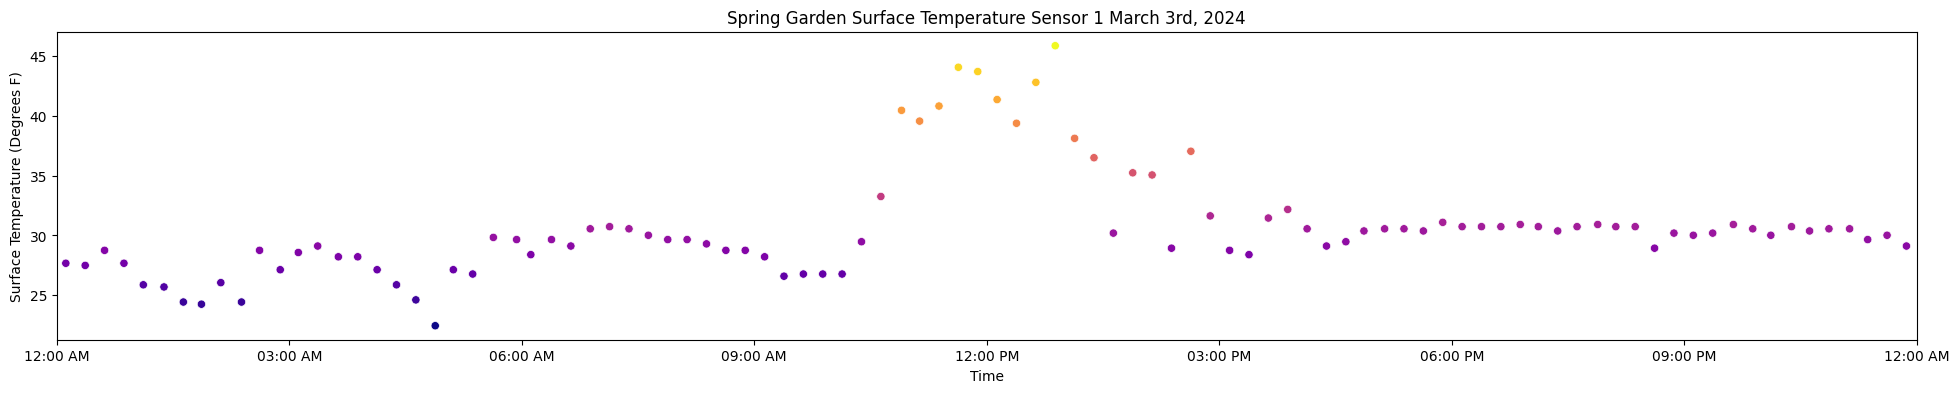

In [ ]:
strSensors = "Surface Temperature Sensor 1"

g1 =sns.scatterplot(data=df,x="datetime",y="essSurfaceTemperature.1",hue="essSurfaceTemperature.1",palette=heatCMap,legend=False)

g1.figure.set_size_inches(xScale,yScale)
g1.axes.set_xlim(startTime,startTime+dt.timedelta(hours=24))
#Control xticks
xTicks = [(startTime + dt.timedelta(hours=3) * i) for i in range(9)]
xLabels = [(x - dt.timedelta(hours=8)).strftime('%I:%M %p') for x in xTicks]
g1.set_xticks(xTicks)
g1.set_xticklabels(xLabels)
g1.axes.set_xlabel("Time")
g1.axes.set_ylabel("Surface Temperature (Degrees F)")
# Add a title
strTitle = strSiteName + " " + strSensors + " " + strDate
g1.set_title(strTitle)

Text(0, 0.5, 'Density')

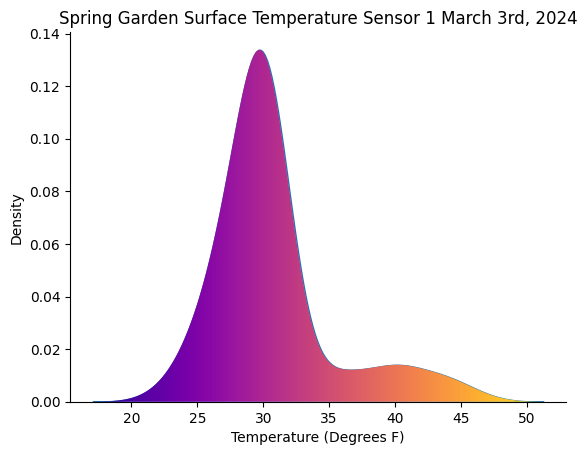

In [ ]:
strSensors = "Surface Temperature Sensor 1"

ax = sns.kdeplot(data=df, x='essSurfaceTemperature.1', fill=True)

sns.despine()
cmap = heatCMap
im = ax.imshow(np.linspace(0, 1, 256).reshape(1, -1), cmap=cmap, aspect='auto',
               extent=[*ax.get_xlim(), *ax.get_ylim()], zorder=10)
path = ax.collections[0].get_paths()[0]
patch = matplotlib.patches.PathPatch(path, transform=ax.transData)
im.set_clip_path(patch)

plt.title(strSiteName + " " + strSensors + " " + strDate)
plt.xlabel("Temperature (Degrees F)")
plt.ylabel("Density")

# Surface Status: Sensor One

In [ ]:
from matplotlib.patches import Rectangle

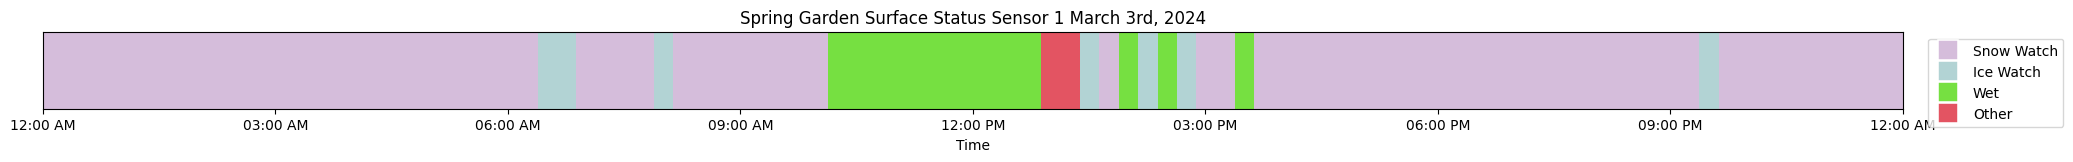

In [ ]:
strSensors = "Surface Status Sensor 1"

myPalette = {"Wet": "#76e041", "Trace Moisture": "#bfe3b1", "Dry": "#f0de92","Error":"#ff7d7d","Ice Warning":"#6ddfe3","Ice Watch":"#b2d3d4","Snow Warning":"#e791ff","Snow Watch": "#d5bddb",'Other':'#e35462'}
g1 =sns.scatterplot(data=df,x="datetime",y=0,hue='essSurfaceStatus.1',legend=True,marker='s',s=200,palette=myPalette)

g1.figure.set_size_inches(xScale,1)
g1.axes.set_xlim(startTime,startTime+dt.timedelta(hours=24))
#Control xticks
xTicks = [(startTime + dt.timedelta(hours=3) * i) for i in range(9)]
xLabels = [(x - dt.timedelta(hours=8)).strftime('%I:%M %p') for x in xTicks]
g1.set_xticks(xTicks)
g1.set_xticklabels(xLabels)
g1.set_yticks([])
g1.axes.set_xlabel("Time")
# Add a title
strTitle = strSiteName + " " + strSensors + " " + strDate
plt.legend(bbox_to_anchor=(1.01,1), loc="upper left")
g1.set_title(strTitle)
prevTime = startTime
for index,row in df.iterrows():
    temp = row['datetime'].replace(tzinfo=None) + dt.timedelta(hours=8)
    g1.add_patch(Rectangle((prevTime,-0.25),temp-prevTime,0.5,facecolor = myPalette[row['essSurfaceStatus.1']],fill=True))
    prevTime = temp
g1.add_patch(Rectangle((prevTime,-0.25),startTime+dt.timedelta(hours=24)-prevTime,0.5,facecolor = myPalette[row['essSurfaceStatus.1']],fill=True))

Text(9.444444444444445, 0.5, 'Proportion')

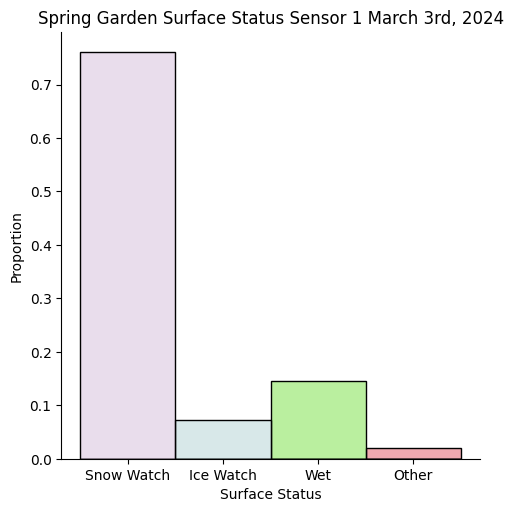

In [ ]:
strSensors = "Surface Status Sensor 1"

myPalette = {"Wet": "#76e041", "Trace Moisture": "#bfe3b1", "Dry": "#f0de92","Error":"#ff7d7d","Ice Warning":"#6ddfe3","Ice Watch":"#b2d3d4","Snow Warning":"#e791ff","Snow Watch": "#d5bddb",'Other':'#e35462'}
sns.displot(data=df,x='essSurfaceStatus.1',hue='essSurfaceStatus.1',stat='probability',palette=myPalette,legend=False)
plt.title(strSiteName + " " + strSensors + " " + strDate)
plt.xlabel("Surface Status")
plt.ylabel("Proportion")

# Surface Temperature: Sensor Two

Text(0.5, 1.0, 'Spring Garden Surface Temperature Sensor 2 March 3rd, 2024')

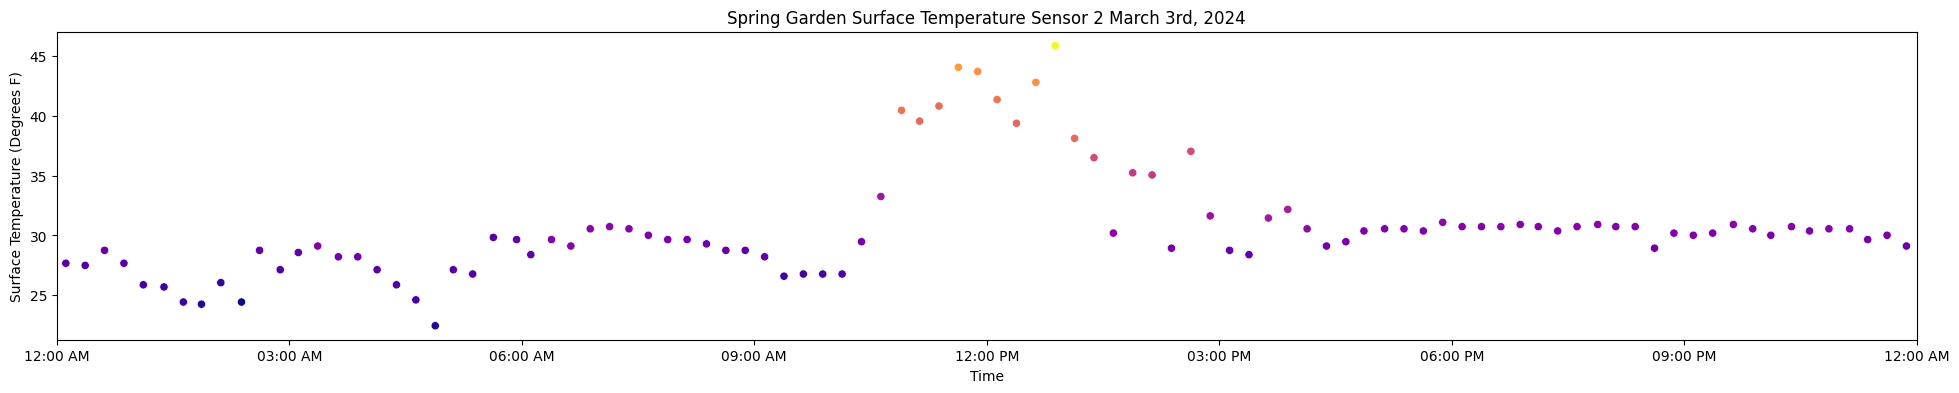

In [ ]:
strSensors = "Surface Temperature Sensor 2"

g1 =sns.scatterplot(data=df,x="datetime",y="essSurfaceTemperature.1",hue="essSurfaceTemperature.2",palette=heatCMap,legend=False)

g1.figure.set_size_inches(xScale,yScale)
g1.axes.set_xlim(startTime,startTime+dt.timedelta(hours=24))
#Control xticks
xTicks = [(startTime + dt.timedelta(hours=3) * i) for i in range(9)]
xLabels = [(x - dt.timedelta(hours=8)).strftime('%I:%M %p') for x in xTicks]
g1.set_xticks(xTicks)
g1.set_xticklabels(xLabels)
g1.axes.set_xlabel("Time")
g1.axes.set_ylabel("Surface Temperature (Degrees F)")
# Add a title
strTitle = strSiteName + " " + strSensors + " " + strDate
g1.set_title(strTitle)

Text(0, 0.5, 'Density')

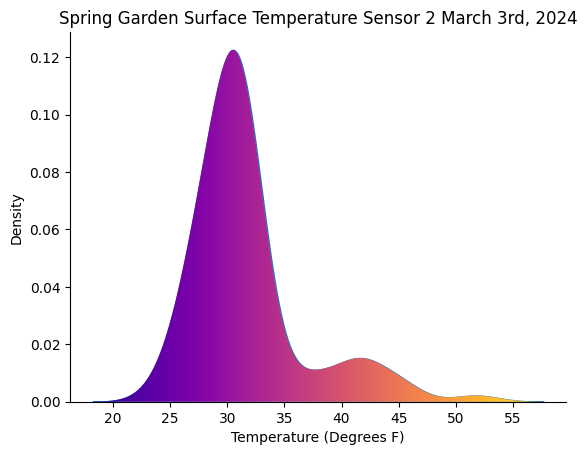

In [ ]:
strSensors = "Surface Temperature Sensor 2"

ax = sns.kdeplot(data=df, x='essSurfaceTemperature.2', fill=True)

sns.despine()
cmap = heatCMap
im = ax.imshow(np.linspace(0, 1, 256).reshape(1, -1), cmap=cmap, aspect='auto',
               extent=[*ax.get_xlim(), *ax.get_ylim()], zorder=10)
path = ax.collections[0].get_paths()[0]
patch = matplotlib.patches.PathPatch(path, transform=ax.transData)
im.set_clip_path(patch)

plt.title(strSiteName + " " + strSensors + " " + strDate)
plt.xlabel("Temperature (Degrees F)")
plt.ylabel("Density")

# Surface Status: Sensor Two

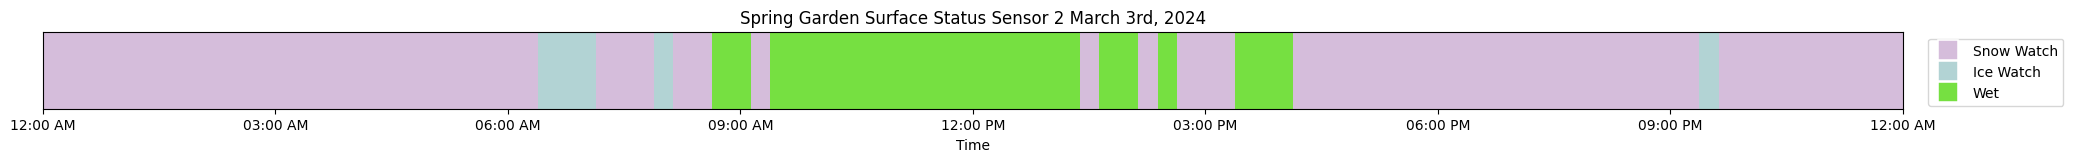

In [ ]:
strSensors = "Surface Status Sensor 2"

myPalette = {"Wet": "#76e041", "Trace Moisture": "#bfe3b1", "Dry": "#f0de92","Error":"#ff7d7d","Ice Warning":"#6ddfe3","Ice Watch":"#b2d3d4","Snow Warning":"#e791ff","Snow Watch": "#d5bddb",'Other':'#e35462'}
g1 =sns.scatterplot(data=df,x="datetime",y=0,hue='essSurfaceStatus.2',legend=True,marker='s',s=200,palette=myPalette)

g1.figure.set_size_inches(xScale,1)
g1.axes.set_xlim(startTime,startTime+dt.timedelta(hours=24))
#Control xticks
xTicks = [(startTime + dt.timedelta(hours=3) * i) for i in range(9)]
xLabels = [(x - dt.timedelta(hours=8)).strftime('%I:%M %p') for x in xTicks]
g1.set_xticks(xTicks)
g1.set_xticklabels(xLabels)
g1.set_yticks([])
g1.axes.set_xlabel("Time")
# Add a title
strTitle = strSiteName + " " + strSensors + " " + strDate
plt.legend(bbox_to_anchor=(1.01,1), loc="upper left")
g1.set_title(strTitle)
prevTime = startTime
for index,row in df.iterrows():
    temp = row['datetime'].replace(tzinfo=None) + dt.timedelta(hours=8)
    g1.add_patch(Rectangle((prevTime,-0.25),temp-prevTime,0.5,facecolor = myPalette[row['essSurfaceStatus.2']],fill=True))
    prevTime = temp
g1.add_patch(Rectangle((prevTime,-0.25),startTime+dt.timedelta(hours=24)-prevTime,0.5,facecolor = myPalette[row['essSurfaceStatus.2']],fill=True))


Text(9.444444444444445, 0.5, 'Proportion')

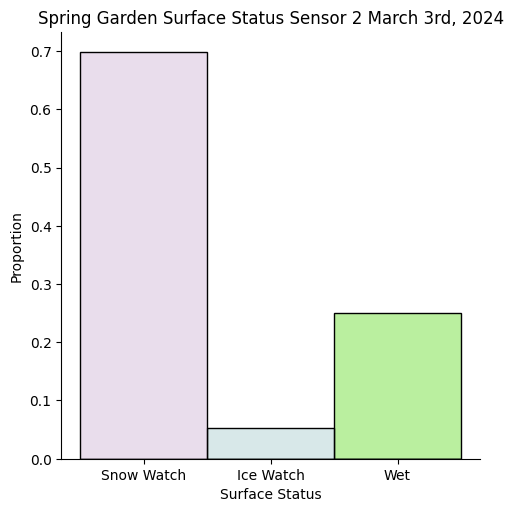

In [ ]:
strSensors = "Surface Status Sensor 2"

myPalette = {"Wet": "#76e041", "Trace Moisture": "#bfe3b1", "Dry": "#f0de92","Error":"#ff7d7d","Ice Warning":"#6ddfe3","Ice Watch":"#b2d3d4","Snow Warning":"#e791ff","Snow Watch": "#d5bddb",'Other':'#e35462'}
sns.displot(data=df,x='essSurfaceStatus.2',hue='essSurfaceStatus.2',stat='probability',palette=myPalette,legend=False)
plt.title(strSiteName + " " + strSensors + " " + strDate)
plt.xlabel("Surface Status")
plt.ylabel("Proportion")